In [1]:
import warnings

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

from get_data import get_balanced_exoplanet_data, get_scaled_balanced_exoplanet_data

warnings.simplefilter("ignore")

In [2]:
x_train, x_test, y_train, y_test = get_balanced_exoplanet_data()
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = get_scaled_balanced_exoplanet_data()

## Test xgboost 



1.0


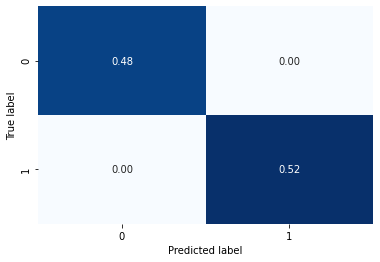

In [3]:
# Parameters
rng_seed = 2023
depth = 5  # max tree depth
boosting_rounds = 100  # no. xgboost boosting rounds
cmap = "Blues"
fmt = ".2f"

model = xgb.XGBClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
    n_estimators=boosting_rounds,
)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test, pred))

## Test with scaling

0.9995049504950495


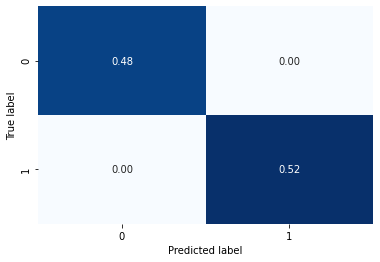

In [4]:
model = xgb.XGBClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
    n_estimators=boosting_rounds,
)
model.fit(x_train_scaled, y_train_scaled)
pred = model.predict(x_test_scaled)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test_scaled, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Metrics
print(accuracy_score(y_test_scaled, pred))

#### Scaling is worse

## Xgboost grid search as func of depth and boosting rounds

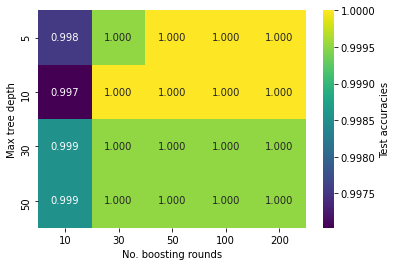

In [5]:
# Parameters
depths = [5, 10, 30, 50]
boost_vals = [10, 30, 50, 100, 200]
filename = "../results/figures/xgboost_gridsearch_depth_boost.png"

accuracies = np.empty((len(depths), len(boost_vals)))
preds = list()
for i, depth in enumerate(depths):
    for j, boost in enumerate(boost_vals):
        model = xgb.XGBClassifier(
            max_depth=depth,
            random_state=rng_seed,
            class_weight="balanced",
            n_estimators=boost,
        )
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        preds.append(pred)
        accuracies[i, j] = accuracy_score(y_test, pred)


sns.heatmap(
    accuracies,
    annot=True,
    fmt=".3f",
    cmap="viridis",
    xticklabels=boost_vals,
    yticklabels=depths,
    cbar_kws={"label": "Test accuracies"},
)
plt.xlabel("No. boosting rounds")
plt.ylabel("Max tree depth")

if filename:
    plt.savefig(filename)
plt.show(); 

# Plot final confusion matrix

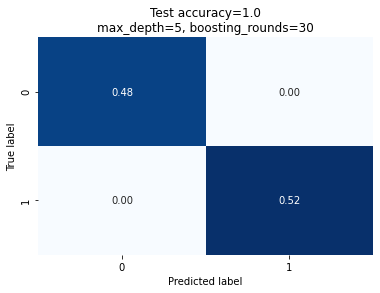

In [6]:
x_train, x_test, y_train, y_test = get_balanced_exoplanet_data()
filename = "../results/figures/xbgoost_conf_matrix.png"

# Parameters
depth = 5  # max tree depth
boosting_rounds = 30  # no. xgboost boosting rounds

model = xgb.XGBClassifier(
    max_depth=depth,
    random_state=rng_seed,
    class_weight="balanced",
    n_estimators=boosting_rounds,
)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Confusion matrix
sns.heatmap(
    confusion_matrix(y_test, pred, normalize="all"),
    annot=True,
    cmap=cmap,
    cbar=False,
    fmt=fmt,
)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title(
    f"Test accuracy={accuracy_score(y_test, pred)}\n"
    + f"max_depth={depth}, {boosting_rounds=}"
)
plt.savefig(filename)
plt.show()